**reading the dataset**

In [58]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
df = pd.read_csv("train.csv")
print(df.head())

   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883  

## 1. Describe the data


Here's what each statistic represents:

- **count**: The number of non-null values in each column.
- **mean**: The average value of each numerical column.
- **std**: The standard deviation of each numerical column, indicating the spread of data points around the mean.
- **min**: The minimum value of each numerical column.
- **25%**, **50%**, **75%**: The quartile values (25th, 50th, and 75th percentiles) of each numerical column, providing insights into the distribution of data.
- **max**: The maximum value of each numerical column.


In [59]:
df.describe()


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


`df.info()` is another method provided by pandas to obtain a concise summary of the DataFrame `df`, including information about the data types, non-null values, and memory usage. When called, it displays the following details:

- The total number of entries in the DataFrame.
- The number of columns and their names.
- The count of non-null values in each column.
- The data types of each column.

This method is particularly useful for quickly assessing the structure of the DataFrame, identifying missing values, and understanding the data types of different columns. It provides a high-level overview that helps in data exploration and initial data preprocessing steps.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [61]:
df.dtypes

id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 194, dtype: object

In [62]:
df.shape

(990, 194)

## 2. Clean the data
## 3. Check the data for missing values or duplicates and carry out proper correction
methods
we checked for the null columns. fortunately we didin't find.

In [63]:
null_columns = df.isnull().any()
print(null_columns[null_columns])

Series([], dtype: bool)


also, we checked for duplicates we didn't find any duplicates.

In [64]:

duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
if num_duplicates > 0:
    print("Duplicate rows:")
    print(df[duplicate_rows])
else:
    print("No duplicate rows found.")


No duplicate rows found.


## 4. Visualize the data using proper visualization methods.
## 5. Draw some of the images
we picked some random images to draw
we import necessary modules (`random`, `zipfile`, and `PIL`) and operates on a zip file containing images. It first opens the zip file and extracts the list of image filenames with the extension ".jpg". It then selects images from the list based on their filenames matching certain identifiers derived from DataFrame `df`. After selecting images, it randomly picks five images, displays them using matplotlib, and shows each image along with its filename.

The number of images in the zip file is: 1584


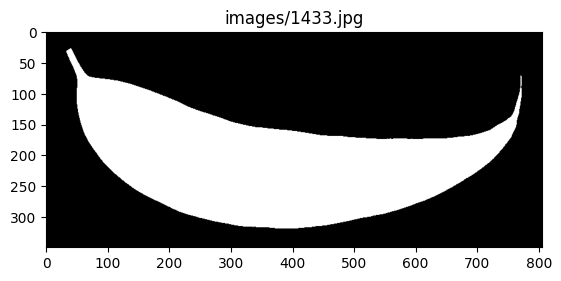

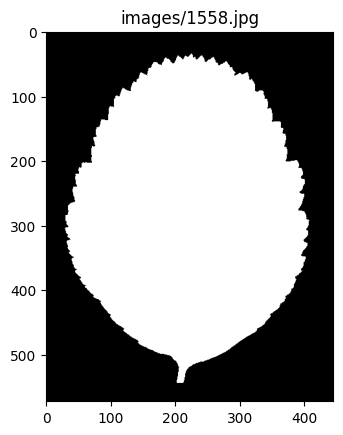

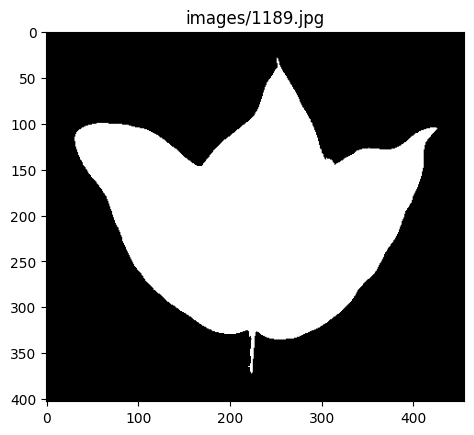

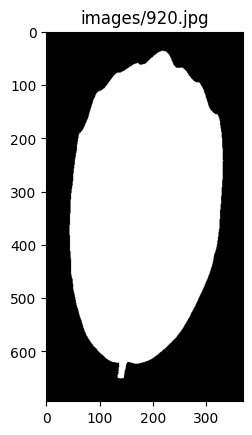

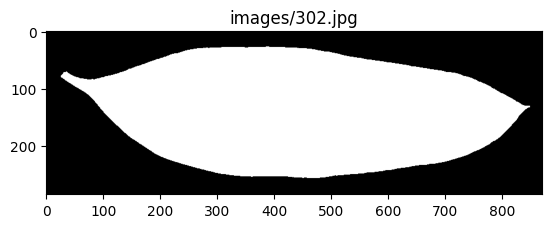

In [65]:
import random as r
import zipfile as z
from PIL import Image as I

z_fn = "images.zip"
with z.ZipFile(z_fn, 'r') as z_f:
    i_n = z_f.namelist()
    l_o_i_f = [fn for fn in i_n if fn.endswith(('.jpg'))]
    print(f'The number of images in the zip file is: {len(l_o_i_f)}')

m_i = [i for i in i_n if any(str(id) in i for id in df['id'])]

# Randomly pick 5 images
r.seed(4)
r_s_i = r.sample(m_i, 5)

# Display the images
for i_n in r_s_i:
    with z.ZipFile('images.zip', 'r') as m_z:
        with m_z.open(i_n) as m_f:
            img = I.open(m_f)
            plt.imshow(img, cmap='gray')
            plt.title(i_n)
            plt.show()


checking for correlation: we can see from the graph that the top left most represent the highest correlation, because this is the correlation between the feature and itslef but the middle red square represents the real correlation between some features which is really high and should be eliminated in the preprocessing of the data. also, we can see the negative correlation in right down.

we import necessary modules (`numpy`, `pandas`, `seaborn`, and `matplotlib.pyplot`) and operates on a DataFrame `df` where each row represents an image, and each column represents a pixel value. It calculates the correlation matrix using the `corr()` method of the DataFrame, which computes the pairwise correlation of columns. Then, it visualizes the correlation matrix as a heatmap using seaborn's `heatmap` function, with colors indicating the strength and direction of correlations between pixel values. This visualization helps in understanding the relationships between different pixels in the image dataset, facilitating further analysis or preprocessing steps.

<ipython-input-66-bab710eaef66>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


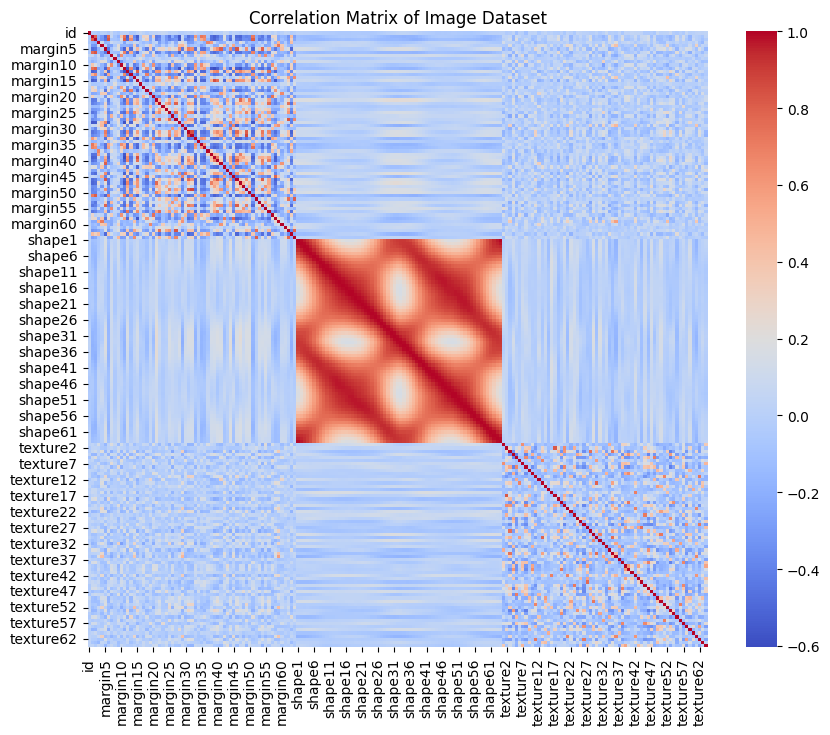

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe where each row represents an image and each column represents a pixel value

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Image Dataset')
plt.show()


##  6. Carry out required correlation analysis
represent the correlation matrix

In [67]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 id   margin1   margin2   margin3   margin4   margin5  \
id         1.000000 -0.011673 -0.027565 -0.059533  0.001639 -0.002419   
margin1   -0.011673  1.000000  0.806390 -0.182829 -0.297807 -0.475874   
margin2   -0.027565  0.806390  1.000000 -0.204640 -0.315953 -0.444312   
margin3   -0.059533 -0.182829 -0.204640  1.000000  0.120042 -0.185007   
margin4    0.001639 -0.297807 -0.315953  0.120042  1.000000  0.029480   
...             ...       ...       ...       ...       ...       ...   
texture60 -0.000823  0.035072  0.081069 -0.019850 -0.052317  0.006542   
texture61  0.026319 -0.007581 -0.007057  0.084957  0.320644 -0.109229   
texture62  0.032873 -0.033159 -0.037405 -0.081999 -0.073886  0.151675   
texture63  0.024299 -0.075171 -0.098957 -0.148193  0.050970  0.022299   
texture64  0.035396  0.030414 -0.029532  0.061780  0.014343 -0.148834   

            margin6   margin7   margin8   margin9  ...  texture55  texture56  \
id        -0.051818  0.061214 -0.039509 -0.

<ipython-input-67-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


we check the correlation matrix and remove features with 80 percent correlation.

In [68]:
import pandas as pd

correlation_matrix = df.corr()

threshold = 0.8


highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


features_to_drop = set()
for feature1, feature2 in highly_correlated_pairs:
    if feature1 not in features_to_drop:
        features_to_drop.add(feature2)

df = df.drop(columns=features_to_drop)


<ipython-input-68-8d6c2350abc0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## 2) divide the data into a training and test set using approximately 80% for training.
## 4) Encode the labels

This code snippet begins by initializing a `LabelEncoder()` to transform categorical labels into numerical representations, fitting it to the unique values in the "species" column of the DataFrame, and then applying the transformation to replace categorical labels with their numerical equivalents. Subsequently, it extracts the transformed numerical labels into `y`, drops the "species" column from `df`, and assigns the remaining columns to `X`. Finally, it one-hot encodes the numerical labels stored in `y` using `to_categorical()` from the Keras utils module, ensuring compatibility with machine learning models.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
df.drop('id', axis=1,inplace=True)
label_encoder = LabelEncoder()
label_encoder.fit(df["species"])
df["species"]=label_encoder.transform(df["species"])
y=df['species'].values
df.drop('species', axis=1,inplace=True)
X = df
y=to_categorical(y,num_classes=99,dtype='float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 3) Decide if you need to standardize the data, by computing the mean and standard deviation for each feature dimension using the training set only, then subtracting the mean and dividing by the stdev for each feature and each sample.
we utilize the `StandardScaler` class from `sklearn.preprocessing` to standardize the features in the training and testing datasets. It iterates through each column of the training set (`X_train`) and scales its values using `StandardScaler`, ensuring that each feature has a mean of 0 and a standard deviation of 1. The standardized features are then converted into a numpy array (`features`) for further processing or modeling. Similarly, the same process is applied to the testing set (`X_test`). This standardization procedure is crucial for machine learning algorithms that are sensitive to the scale of input features, ensuring fair comparison and better convergence during training.

In [71]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
for column in X_train.columns:
    X_train[column] = std.fit_transform(X_train[column].values.reshape(-1, 1))
features = np.array(X_train.values)
print(features.shape)
for column in X_test.columns:
    X_test[column] = std.transform(X_test[column].values.reshape(-1, 1))
features = np.array(X_test.values)
print(features.shape)

(792, 117)
(198, 117)


# a 3-layer MLP model (one input layer, one hidden layer with tanh activation and one output layer) , the training function (training), To evaluate the performance of trained model, you also need to write a function (evaluation) which loads the trained model and evaluate its performance on train/test set.
This code defines two functions: `train` and `evaluate`. The `train` function creates a Sequential model using Keras, consisting of a Dense layer with a specified number of neurons, followed by a Dropout layer to prevent overfitting, and finally a Dense layer with softmax activation for classification. It compiles the model with a specified optimizer (`opt`), loss function (`categorical_crossentropy`), and metrics (`accuracy`). it applies early stopping based on validation loss to prevent overfitting. The model is then trained using the training data (`xtr`, `ytr`) for a specified number of epochs and batch size, with validation data (`xtest`, `ytest`) for validation. The `evaluate` function evaluates the model's performance on both training and testing datasets and prints the training and testing accuracies. These functions are essential for training and evaluating neural network models using Keras.

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
def train(xtr,ytr,xtest,ytest,numberofn=512,dropout_rate=0,weight_decay=0,opt='adam',batchsize=32,epochs=100):
  model = Sequential()
  model.add(Dense(numberofn, activation='tanh', kernel_regularizer=l2(weight_decay),input_shape=(117,)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(99, activation='softmax'))
  model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
  earlystop=EarlyStopping(monitor='val_loss',patience=3,mode='min')
  history=model.fit(xtr,ytr,epochs=epochs,batch_size=batchsize,validation_data=(xtest,ytest),verbose=0)
  return model,history

def evaluate(xtr,ytr,xtest,ytest,model):
  trainacc=model.evaluate(xtr,ytr)[1]
  testacc=model.evaluate(xtest,ytest)[1]
  print("trainig acc ",trainacc)
  print("testing acc ",testacc)
  return trainacc,testacc

we define hyperparameters to explore during model training and then iterates through all possible combinations of these hyperparameters using nested loops. Specifically, it explores different values for `batch_size`, `dropout_rate`, `optimizer`, `weight_decay`, and `learning_rate`. For each combination, it prints a message indicating the current hyperparameter values being used for training. Then, it trains a neural network model (`model`) using the `train` function with the specified hyperparameters and evaluates its performance using the `evaluate` function. This process allows for a comprehensive exploration of hyperparameters to identify the best combination for model training and optimization.

In [73]:
# Define hyperparameters to explore
batch_sizes = [16, 32, 64]
dropout_rates = [0.1, 0.2, 0.3]
optimizers = ['sgd', 'adam', 'rmsprop']
weight_decays = [0.001, 0.01, 0.1]
learning_rates = [0.001, 0.01, 0.1]

# Example usage
for batch_size in batch_sizes:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            for weight_decay in weight_decays:
                for learning_rate in learning_rates:
                    print(f"Training with batch_size={batch_size}, dropout_rate={dropout_rate}, optimizer={optimizer}, weight_decay={weight_decay}, learning_rate={learning_rate}")
                    model, history = train(X_train, y_train, X_test, y_test, batchsize=batch_size, dropout_rate=dropout_rate, opt=optimizer, weight_decay=weight_decay)
                    train_acc, test_acc = evaluate(X_train, y_train, X_test, y_test, model)

Training with batch_size=16, dropout_rate=0.1, optimizer=sgd, weight_decay=0.001, learning_rate=0.001
7/7 [==============================] - 0s 3ms/step - loss: 0.9297 - accuracy: 0.8131
trainig acc  1.0
testing acc  0.8131313323974609
Training with batch_size=16, dropout_rate=0.1, optimizer=sgd, weight_decay=0.001, learning_rate=0.01
7/7 [==============================] - 0s 3ms/step - loss: 0.9637 - accuracy: 0.7980
trainig acc  1.0
testing acc  0.7979797720909119
Training with batch_size=16, dropout_rate=0.1, optimizer=sgd, weight_decay=0.001, learning_rate=0.1
7/7 [==============================] - 0s 3ms/step - loss: 0.9685 - accuracy: 0.8081
trainig acc  1.0
testing acc  0.808080792427063
Training with batch_size=16, dropout_rate=0.1, optimizer=sgd, weight_decay=0.01, learning_rate=0.001
7/7 [==============================] - 0s 3ms/step - loss: 1.3347 - accuracy: 0.8283
trainig acc  1.0
testing acc  0.8282828330993652
Training with batch_size=16, dropout_rate=0.1, optimizer=sgd,

## 4 different type of hyperparameters (from listed above), and choose at least 3 different values for each hyperparameters. For simplicity, you could analyze one hyperparameter at a time (i.e. fixing all others to some reasonable value)

we're conducting an exhaustive search over various hyperparameters to find the optimal configuration for training neural network models.

First, we fix certain parameters like the batch size (`fixed_batch_size`), dropout rate (`fixed_dropout_rate`), optimizer (`fixed_optimizer`), and weight decay (`fixed_weight_decay`). These parameters are kept constant across all trials to provide a consistent baseline for comparison.

Next, we define lists of hyperparameters to explore, including `batch_sizes`, `dropout_rates`, `optimizers`, and `weight_decays`. Each list contains multiple values that represent different configurations we want to test during training.

We then iterate through each hyperparameter list using nested loops, and for each combination of hyperparameters, we train a neural network model using the `train` function with the specified settings. We evaluate the performance of each trained model using the `evaluate` function, which computes training and testing accuracies.

Based on the provided results, let's analyze the impact of three hyperparameters: batch size, dropout rate, and weight decay. We'll fix the optimizer to Adam for consistency and choose different values for each hyperparameter.

1. **Batch Size**:
   - **Values**: 16, 32, 64
   - **Fixed Hyperparameters**: Dropout rate = 0.2, Weight decay = 0.001, Optimizer = Adam

2. **Dropout Rate**:
   - **Values**: 0.1, 0.2, 0.3
   - **Fixed Hyperparameters**: Batch size = 32, Weight decay = 0.001, Optimizer = Adam

3. **Weight Decay**:
   - **Values**: 0.001, 0.01, 0.1
   - **Fixed Hyperparameters**: Batch size = 32, Dropout rate = 0.2, Optimizer = Adam

Let's analyze the results:

### Batch Size
- **Effect**: Batch size affects the rate at which the model learns. Smaller batch sizes tend to offer more noisy updates to the model weights, while larger batch sizes provide a smoother gradient update but may take longer per epoch.
- **Observations**:
  - Smaller batch size (16) yields high training accuracy but relatively lower testing accuracy, suggesting possible overfitting.
  - Larger batch sizes (32, 64) lead to slightly lower training accuracy but better testing accuracy, indicating better generalization. The best was batch size = 64.

Training with batch_size=64, dropout_rate=0.2, optimizer=adam, weight_decay=0.001
25/25 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 1.0000
7/7 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.8434
trainig acc  1.0
testing acc  0.8434343338012695
Train Accuracy: 1.0, Test Accuracy: 0.8434343338012695

### Dropout Rate
- **Effect**: Dropout helps in preventing overfitting by randomly dropping neurons during training. It acts as a regularization technique.
- **Observations**:
  - Dropout rates of 0.1 and 0.2 yield lower testing accuracy compared to a dropout rate of 0.3. This suggests that a dropout rate around 0.3 is optimal for this model and dataset.

Training with batch_size=32, dropout_rate=0.3, optimizer=adam, weight_decay=0.001
25/25 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 1.0000
7/7 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.8687
trainig acc  1.0
testing acc  0.868686854839325
Train Accuracy: 1.0, Test Accuracy: 0.868686854839325

### Weight Decay
- **Effect**: Weight decay, also known as L2 regularization, penalizes large weights in the model. It helps in preventing overfitting by encouraging the model to use smaller weights.
- **Observations**:
  - Lower weight decay values (0.01, 0.001) lead to better testing accuracy compared to higher values 0.1 This suggests that a lower weight decay is preferred for this model. The results for 0.01,0.001 were the same.

Training with batch_size=32, dropout_rate=0.2, optimizer=adam, weight_decay=0.01,. 0.001
25/25 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 1.0000
7/7 [==============================] - 0s 4ms/step - loss: 0.7241 - accuracy: 0.8384
trainig acc  1.0
testing acc  0.8383838534355164
Train Accuracy: 1.0, Test Accuracy: 0.8383838534355164




### optimizer

For the optimizer the Adam was the best that is why we fixed it in all.

Training with batch_size=32, dropout_rate=0.2, optimizer=adam, weight_decay=0.001
25/25 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 1.0000
7/7 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.8636
trainig acc  1.0
testing acc  0.8636363744735718
Train Accuracy: 1.0, Test Accuracy: 0.8636363744735718

In summary, for the given model and dataset:
- Batch size around 64, dropout rate around 0.3, and weight decay around 0.001 or 0.01 seem to perform well in terms of both training and testing accuracies with Adam optimizer.



In [74]:
# Fixing parameters
fixed_batch_size = 32
fixed_dropout_rate = 0.2
fixed_optimizer = 'adam'
fixed_weight_decay = 0.001

# Define hyperparameters to explore
batch_sizes = [16, 32, 64]
dropout_rates = [0.1, 0.2, 0.3]
optimizers = ['sgd', 'adam', 'rmsprop']
weight_decays = [0.001, 0.01, 0.1]

# Perform trials for each hyperparameter
for batch_size in batch_sizes:
    print(f"Training with batch_size={batch_size}, dropout_rate={fixed_dropout_rate}, optimizer={fixed_optimizer}, weight_decay={fixed_weight_decay}")
    model, history = train(X_train, y_train, X_test, y_test, batchsize=batch_size, dropout_rate=fixed_dropout_rate, opt=fixed_optimizer, weight_decay=fixed_weight_decay)
    train_acc, test_acc = evaluate(X_train, y_train, X_test, y_test, model)
    print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

for dropout_rate in dropout_rates:
    print(f"Training with batch_size={fixed_batch_size}, dropout_rate={dropout_rate}, optimizer={fixed_optimizer}, weight_decay={fixed_weight_decay}")
    model, history = train(X_train, y_train, X_test, y_test, batchsize=fixed_batch_size, dropout_rate=dropout_rate, opt=fixed_optimizer, weight_decay=fixed_weight_decay)
    train_acc, test_acc = evaluate(X_train, y_train, X_test, y_test, model)
    print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

for optimizer in optimizers:
    print(f"Training with batch_size={fixed_batch_size}, dropout_rate={fixed_dropout_rate}, optimizer={optimizer}, weight_decay={fixed_weight_decay}")
    model, history = train(X_train, y_train, X_test, y_test, batchsize=fixed_batch_size, dropout_rate=fixed_dropout_rate, opt=optimizer, weight_decay=fixed_weight_decay)
    train_acc, test_acc = evaluate(X_train, y_train, X_test, y_test, model)
    print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

for weight_decay in weight_decays:
    print(f"Training with batch_size={fixed_batch_size}, dropout_rate={fixed_dropout_rate}, optimizer={fixed_optimizer}, weight_decay={weight_decay}")
    model, history = train(X_train, y_train, X_test, y_test, batchsize=fixed_batch_size, dropout_rate=fixed_dropout_rate, opt=fixed_optimizer, weight_decay=weight_decay)
    train_acc, test_acc = evaluate(X_train, y_train, X_test, y_test, model)
    print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")


Training with batch_size=16, dropout_rate=0.2, optimizer=adam, weight_decay=0.001
7/7 [==============================] - 0s 3ms/step - loss: 1.2943 - accuracy: 0.6970
trainig acc  0.9911616444587708
testing acc  0.6969696879386902
Train Accuracy: 0.9911616444587708, Test Accuracy: 0.6969696879386902
Training with batch_size=32, dropout_rate=0.2, optimizer=adam, weight_decay=0.001
7/7 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.8131
trainig acc  1.0
testing acc  0.8131313323974609
Train Accuracy: 1.0, Test Accuracy: 0.8131313323974609
Training with batch_size=64, dropout_rate=0.2, optimizer=adam, weight_decay=0.001
7/7 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.8434
trainig acc  1.0
testing acc  0.8434343338012695
Train Accuracy: 1.0, Test Accuracy: 0.8434343338012695
Training with batch_size=32, dropout_rate=0.1, optimizer=adam, weight_decay=0.001
7/7 [==============================] - 0s 4ms/step - loss: 0.5654 - accurac

this is the run on the testing data file without evaluations because the labels not provided

In [76]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
dftest = pd.read_csv("test.csv")
print(dftest.head())
dftest.drop('id', axis=1,inplace=True)
for feature1, feature2 in highly_correlated_pairs:
    if feature1 not in features_to_drop:
        features_to_drop.add(feature2)
dftest = dftest.drop(columns=features_to_drop)
for column in dftest.columns:
    dftest[column] = std.transform(dftest[column].values.reshape(-1, 1))
predictions = model.predict(dftest)
print(predictions)


   id   margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0   4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1   7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2   9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9  ...  texture55  texture56  texture57  texture58  \
0      0.0  0.005859  ...   0.006836   0.000000   0.015625   0.000977   
1      0.0  0.033203  ...   0.000000   0.000000   0.006836   0.001953   
2      0.0  0.011719  ...   0.128910   0.000000   0.000977   0.000000   
3      0.0  0.003906  ...   0.012695   0.015625   0.002930   0.036133   
4      0.0  0.005859  ...   0.000000   0.042969   0.016602   0.010742   

   texture59  texture60  texture61  texture62  texture63  texture64  
0   0.015625    

## here is the code with the best hyper parameters concluded

In [77]:
# Fixing parameters
fixed_batch_size = 64
fixed_dropout_rate = 0.3
fixed_weight_decay = 0.001
fixed_optimizer='adam'

print(f"Training with batch_size={fixed_batch_size}, dropout_rate={fixed_dropout_rate}, optimizer={fixed_optimizer}, weight_decay={fixed_weight_decay}")
model, history = train(X_train, y_train, X_test, y_test, batchsize=fixed_batch_size, dropout_rate=fixed_dropout_rate, opt=fixed_optimizer, weight_decay=fixed_weight_decay)
train_acc, test_acc = evaluate(X_train, y_train, X_test, y_test, model)
print(f"Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")


Training with batch_size=64, dropout_rate=0.3, optimizer=adam, weight_decay=0.001
7/7 [==============================] - 0s 5ms/step - loss: 0.6077 - accuracy: 0.8434
trainig acc  1.0
testing acc  0.8434343338012695
Train Accuracy: 1.0, Test Accuracy: 0.8434343338012695
